In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Connect to SQLite (creates the DB if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ('Apples', 10, 0.5),
    ('Bananas', 5, 0.3),
    ('Oranges', 8, 0.6),
    ('Apples', 7, 0.5),
    ('Bananas', 12, 0.3),
    ('Oranges', 3, 0.6),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [12]:
query_qty = """
SELECT 
    product, 
    SUM(quantity) AS total_qty
FROM sales 
GROUP BY product
"""

df_qty = pd.read_sql_query(query_qty, conn)
print("Total Quantity Sold:\n", df_qty)


Total Quantity Sold:
    product  total_qty
0   Apples         17
1  Bananas         17
2  Oranges         11


In [14]:
query_rev = """
SELECT 
    product, 
    SUM(quantity * price) AS revenue
FROM sales 
GROUP BY product
"""

df_rev = pd.read_sql_query(query_rev, conn)
print("\nTotal Revenue:\n", df_rev)


Total Revenue:
    product  revenue
0   Apples      8.5
1  Bananas      5.1
2  Oranges      6.6


In [16]:
print("Sales Summary:\n")
print(df)


Sales Summary:

   product  total_qty  revenue
0   Apples         17      8.5
1  Bananas         17      5.1
2  Oranges         11      6.6


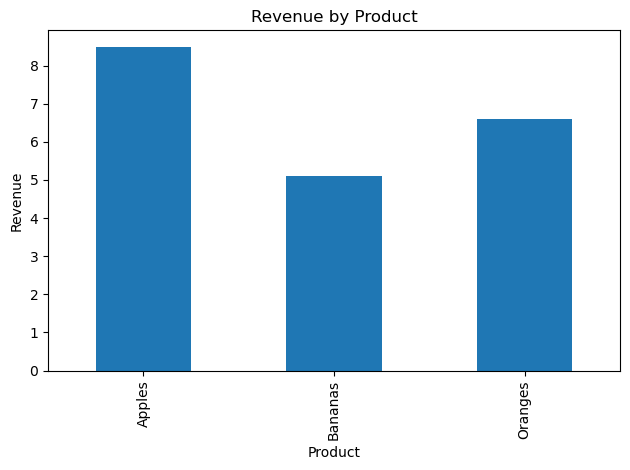

In [18]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()